In [ ]:
y_predicted

array([0, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
x_input = data['fixed acidity']
#define logistic function
def logistic(x):
    return 1/(1+np.exp(-x))

Text(0, 0.5, 'Output')

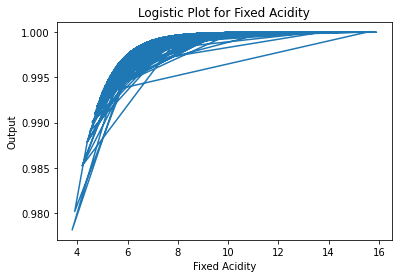

In [ ]:
#calculate y values for sigmoid plot
y_output = logistic(x_input)
#create plot
plt.plot(x_input,y_output)
#set plot title and labels
plt.title('Logistic Plot for Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Output')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Load the winequality-white dataset
# This example assumes that the dataset has already been preprocessed
# and is available as a pandas dataframe called "data"
# Define the features and target variables
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Create the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Predict the target variable for the test data
y_pred = model.predict(X_test)
# Estimate the class probabilities for the test data
probas = model.predict_proba(X_test)
# Print the accuracy score for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.54375


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid featu

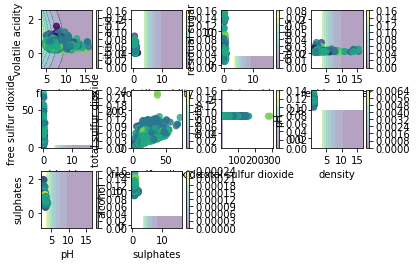

In [ ]:
# Create a meshgrid for all 11 features
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
for i in range(2, 12):
    plt.subplot(3, 4, i-1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X_plot = np.zeros((xx.shape[0] * xx.shape[1], 11))
    X_plot[:, 0] = xx.ravel()
    X_plot[:, 1] = yy.ravel()

    for j in range(2, 12):
         if i != j:
              X_plot[:, j-1] = X[X.columns[j-1]].mean()

    Z = model.predict_proba(X_plot)[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries as a contour plot
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.colorbar()

    # Plot the data points on top of the decision boundaries
    plt.scatter(X.iloc[:, i-2], X.iloc[:, i-1], c=y, alpha=0.8)
    plt.xlabel(X.columns[i-2])
    plt.ylabel(X.columns[i-1])
plt.show()